In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
def colorConvert(image):
  return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
cap = cv2.VideoCapture('/content/video_1.mp4')

#Randomly selecting 30 frames
frame_get = cap.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size = 30)

#Storing captured frames in an array
frames = []
for i in frame_get:
  cap.set(cv2.CAP_PROP_POS_FRAMES, i)
  ret, frame = cap.read()
  frames.append(frame)

cap.release()

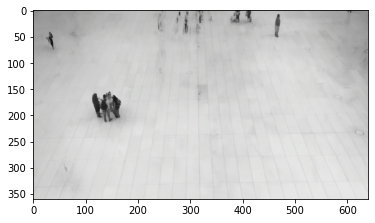

In [ ]:
frame_median = np.median(frames, axis = 0).astype(dtype = np.uint8)
plt.imshow(colorConvert(frame_median))

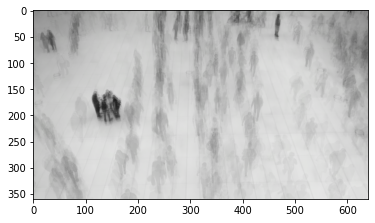

In [ ]:
frame_avg = np.average(frames, axis = 0).astype(dtype = np.uint8)
plt.imshow(colorConvert(frame_avg))
     

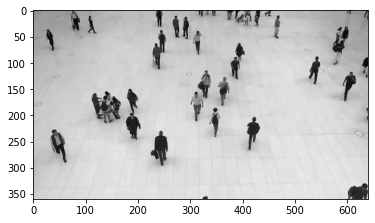

In [ ]:
frame_sample = frames[0]
plt.imshow(colorConvert(frame_sample))
     

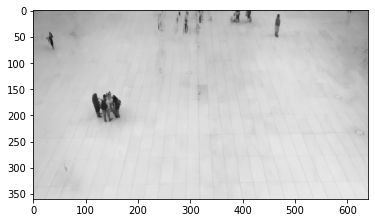

In [ ]:
gray_frame_median = cv2.cvtColor(frame_median, cv2.COLOR_BGR2GRAY)
plt.imshow(colorConvert(gray_frame_median))

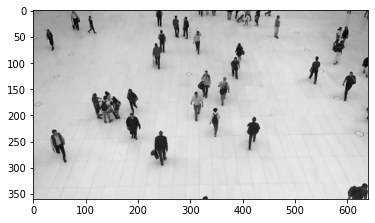

In [ ]:
gray_frame_sample = cv2.cvtColor(frame_sample, cv2.COLOR_BGR2GRAY)
plt.imshow(colorConvert(gray_frame_sample))

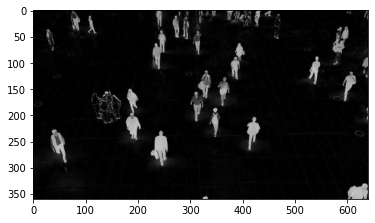

In [ ]:
bg_removed_frame = cv2.absdiff(gray_frame_sample, gray_frame_median)
plt.imshow(colorConvert(bg_removed_frame))

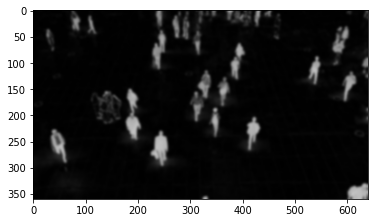

In [ ]:
frame_blur = cv2.GaussianBlur(bg_removed_frame, (11,11), 0)
plt.imshow(colorConvert(frame_blur))
     

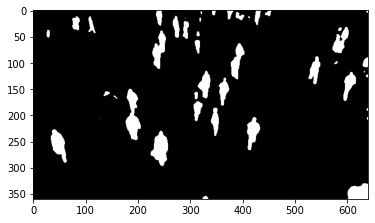

In [ ]:
ret, frame_threshold = cv2.threshold(frame_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(colorConvert(frame_threshold))
     

In [ ]:
(contours, _ ) = cv2.findContours(frame_threshold.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

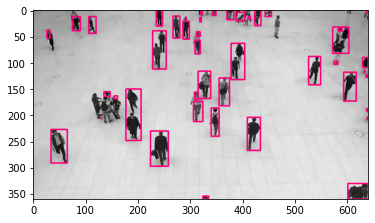

In [ ]:
for i in contours:
  x, y, width, height = cv2.boundingRect(i)
  cv2.rectangle(frame_sample, (x,y), (x + width, y + height), (123,0,255), 2)
plt.imshow(colorConvert(frame_sample))

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video_writer = cv2.VideoWriter('old1.mp4', fourcc, 620.0, (640, 480))
     

In [ ]:
cap = cv2.VideoCapture('/content/drive/MyDrive/video_1.mp4')

#Randomly selecting 30 frames
frame_tot = cap.get(cv2.CAP_PROP_FRAME_COUNT)
frame_tot
     


0.0

In [ ]:
frame_count = 0
while (frame_count < frame_tot - 1):
  frame_count+=1
  ret, frame = cap.read()
  # Converting frame to grayscale
  gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  # Calculating Absolute Difference between Current Frame and Median Frame
  dframe = cv2.absdiff(gray_frame, gray_frame_median)
  # Applying Gaussian Blur to reduce noise
  blur_frame = cv2.GaussianBlur(dframe, (11,11), 0)
  # Binarizing frame - Thresholding
  ret, threshold_frame = cv2.threshold(blur_frame, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  # Identifying Contours
  (contours, _ ) = cv2.findContours(threshold_frame.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  # Drawing Boundary Boxes for each Contour
  for i in contours:
    x, y, width, height = cv2.boundingRect(i)
    cv2.rectangle(frame, (x,y), (x + width, y + height), (123,0,255), 2)
    video_writer.write(cv2.resize(frame, (640,480)))
# Releasing Video Object
cap.release()
video_writer.release()
     